In [11]:
import pandas as pd
import numpy as np

In [12]:
operational_settings = ['operational_setting_{}'.format(i + 1) for i in range (3)]
sensor_columns = ['sensor_measurement_{}'.format(i + 1) for i in range(26)]
cols = ['engine_no', 'time_in_cycles'] + operational_settings + sensor_columns
data = pd.read_csv('../input/train_FD002.txt', sep=' ', header=-1, names=cols)
data.head()

,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,334,2223,100.00,14.73,8.8071,NaN,NaN,NaN,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,330,2212,100.00,10.41,6.2665,NaN,NaN,NaN,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,309,1915,84.93,14.08,8.6723,NaN,NaN,NaN,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,329,2212,100.00,10.59,6.4701,NaN,NaN,NaN,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,309,1915,84.93,14.13,8.5286,NaN,NaN,NaN,NaN,NaN


In [13]:
data.shape

(53759, 31)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 31 columns):
engine_no                53759 non-null int64
time_in_cycles           53759 non-null int64
operational_setting_1    53759 non-null float64
operational_setting_2    53759 non-null float64
operational_setting_3    53759 non-null float64
sensor_measurement_1     53759 non-null float64
sensor_measurement_2     53759 non-null float64
sensor_measurement_3     53759 non-null float64
sensor_measurement_4     53759 non-null float64
sensor_measurement_5     53759 non-null float64
sensor_measurement_6     53759 non-null float64
sensor_measurement_7     53759 non-null float64
sensor_measurement_8     53759 non-null float64
sensor_measurement_9     53759 non-null float64
sensor_measurement_10    53759 non-null float64
sensor_measurement_11    53759 non-null float64
sensor_measurement_12    53759 non-null float64
sensor_measurement_13    53759 non-null float64
sensor_measurement_14    53759 

In [20]:
# convert the datatypes
data['sensor_measurement_17'] = data['sensor_measurement_17'].astype(np.float32)
data['sensor_measurement_18'] = data['sensor_measurement_18'].astype(np.float32)


In [18]:
data.groupby('engine_no', as_index=False)['time_in_cycles'].max().rename(columns = {'time_in_cycles': 'max_lives'})


,engine_no,max_lives
0,1,149
1,2,269
2,3,206
3,4,235
4,5,154
5,6,175
6,7,174
7,8,151
8,9,199
9,10,184


In [36]:
np.random.seed(50)

# Dataframe to hold results
predictor_df = pd.DataFrame()
target_df = pd.DataFrame(columns=['target'])
engine_list = data['engine_no'].unique()

# Iterate through each engine
for engine in engine_list:
    
    # Subset to the engine
    subset = data[data['engine_no'] == engine].copy()
    subset.reset_index(inplace=True,drop=True)
    
    life_span = subset.shape[0]
    
    # Select a random index for the prediction point
    random_index = np.random.randint(10, life_span - 1)
    
    predictor = subset.iloc[:random_index, :].copy()
    target = life_span - random_index
    
    predictor_df = predictor_df.append(predictor, ignore_index=True)
    target_df = target_df.append(pd.DataFrame({'target': target}, index = [0]),ignore_index=True)
    

In [37]:
predictor_df.head()

,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,334.0,2223.0,100.00,14.73,8.8071,NaN,NaN,NaN,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,330.0,2212.0,100.00,10.41,6.2665,NaN,NaN,NaN,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,309.0,1915.0,84.93,14.08,8.6723,NaN,NaN,NaN,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,329.0,2212.0,100.00,10.59,6.4701,NaN,NaN,NaN,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,309.0,1915.0,84.93,14.13,8.5286,NaN,NaN,NaN,NaN,NaN


In [38]:
predictor_df.shape

(27403, 31)

In [39]:
target_df.head()

,target
0,30
1,127
2,126
3,155
4,122


In [42]:
target_df.shape

(260, 1)

In [43]:
# save our model input and output into local drive
predictor_df.to_csv('../input/002_predictor_df.csv',index=False)
target_df.to_csv('../input/002_target_df.csv',index=False)

In [48]:
# load data
train_predictor = pd.read_csv('../input/002_predictor_df.csv')
train_target = pd.read_csv('../input/002_target_df.csv')


In [55]:
train_mean = train_predictor.groupby('engine_no', as_index=False)['time_in_cycles'].count().rename(columns = {'time_in_cycles': 'half_life'})['half_life'].mean()


In [44]:
test_predictor = pd.read_csv('../input/test_FD002.txt', sep=' ', header=-1, names=cols)
test_target = pd.read_csv('../input/RUL_FD002.txt', sep=' ', header=-1, names=['target'], index_col=False)


In [57]:
test_mean = test_predictor.groupby('engine_no', as_index=False)['time_in_cycles'].count().rename(columns = {'time_in_cycles': 'half_life'})['half_life'].mean()


In [59]:
# Half life guess
train_half_life_guess = train_predictor.groupby('engine_no').apply(lambda x: 2 * x.shape[0])

# Dataframe with both baselines
train_baseline = pd.DataFrame({'engine_no': train_predictor['engine_no'].unique(), 
                               'half_life_guess': train_half_life_guess.values,
                               'average_guess': train_mean})

In [60]:
# Half life guess
test_half_life_guess = test_predictor.groupby('engine_no').apply(lambda x: 2 * x.shape[0])

# Dataframe with both baselines
test_baseline = pd.DataFrame({'engine_no': test_predictor['engine_no'].unique(), 
                               'half_life_guess': test_half_life_guess.values,
                               'average_guess': test_mean})

In [61]:
def mape(y_true, pred):
    mape = 100 * np.mean(abs(y_true - pred) / y_true)
    return mape

In [63]:
print('The average_guess train MAPE is: {:.2f}.'.format(mape(train_target['target'], train_baseline['average_guess'])))
print("The average_guess  test MAPE is: {:.2f}.".format(mape(test_target['target'], test_baseline['average_guess'])))


The average_guess train MAPE is: 165.47.
The average_guess  test MAPE is: 306.51.


In [64]:
print('The half_life train MAPE is: {:.2f}.'.format(mape(train_target['target'], train_baseline['half_life_guess'])))
print('The half_life  test MAPE is: {:.2f}.'.format(mape(test_target['target'], test_baseline['half_life_guess'])))


The half_life train MAPE is: 614.89.
The half_life  test MAPE is: 926.51.


# Feature Engineering

In [67]:
# aggregate each column
train_agg = train_predictor.groupby('engine_no').agg(['min','max','mean','sum','std'])
train_agg.head()


time_in_cycles                              operational_setting_1  \
                     min  max  mean    sum        std                   min   
engine_no                                                                     
1                      1  119  60.0   7140  34.496377                0.0000   
2                      1  142  71.5  10153  41.135953                0.0000   
3                      1   80  40.5   3240  23.237900                0.0002   
4                      1   80  40.5   3240  23.237900                0.0004   
5                      1   32  16.5    528   9.380832                0.0008   

                                                    ... sensor_measurement_25  \
               max       mean        sum        std ...                   min   
engine_no                                           ...                         
1          42.0077  25.414484  3024.3236  15.300117 ...                   NaN   
2          42.0076  23.734917  3370.3582  14.711035 ...                   NaN   
3          42.0073  25.365650  2029.2520  13.972098 ...                   NaN   
4          42.0075  23.640294  1891.2235  15.508015 ...                   NaN   
5          42.0071  21.721191   695.0781  14.481060 ...                   NaN   

                            sensor_measurement_26                    
          max mean  sum std                   min max mean  sum std  
engine_no                                                            
1         NaN  NaN  0.0 NaN                   NaN NaN  NaN  0.0 NaN  
2         NaN  NaN  0.0 NaN                   NaN NaN  NaN  0.0 NaN  
3         NaN  NaN  0.0 NaN                   NaN NaN  NaN  0.0 NaN  
4         NaN  NaN  0.0 NaN                   NaN NaN  NaN  0.0 NaN  
5         NaN  NaN  0.0 NaN                   NaN NaN  NaN  0.0 NaN  

[5 rows x 150 columns]

In [70]:
train_agg.columns = pd.Index([e[0] + "_" + e[1] for e in train_agg.columns.tolist()])


In [72]:
test_agg = test_predictor.groupby('engine_no').agg(['min','max','mean','sum','std'])
test_agg.columns = pd.Index([e[0] + "_" + e[1] for e in test_agg.columns.tolist()])


# Machine learning model

In [78]:
train_agg.describe()

,time_in_cycles_min,time_in_cycles_max,time_in_cycles_mean,time_in_cycles_sum,time_in_cycles_std,operational_setting_1_min,operational_setting_1_max,operational_setting_1_mean,operational_setting_1_sum,operational_setting_1_std,...,sensor_measurement_25_min,sensor_measurement_25_max,sensor_measurement_25_mean,sensor_measurement_25_sum,sensor_measurement_25_std,sensor_measurement_26_min,sensor_measurement_26_max,sensor_measurement_26_mean,sensor_measurement_26_sum,sensor_measurement_26_std
count,260.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,0.0,0.0,0.0,260.0,0.0,0.0,0.0,0.0,260.0,0.0
mean,1.0,105.396154,53.198077,7551.107692,30.568999,0.154133,42.007333,24.048738,2524.938816,14.727457,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
std,0.0,62.477863,31.238932,8245.244002,18.036225,1.233138,0.001096,1.698750,1498.943889,0.829225,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
min,1.0,10.000000,5.500000,55.000000,3.027650,0.000000,42.000100,17.940188,259.041500,10.591991,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
25%,1.0,55.000000,28.000000,1540.000000,16.020820,0.000100,42.007300,23.087071,1326.909600,14.439388,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
50%,1.0,96.500000,48.750000,4704.500000,28.001116,0.000100,42.007700,23.952841,2278.801600,14.756949,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
75%,1.0,149.250000,75.125000,11212.500000,43.228860,0.000400,42.007900,24.956215,3593.184450,15.197651,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
max,1.0,332.000000,166.500000,55278.000000,95.984374,10.002200,42.008000,29.503440,8361.907000,17.211161,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [104]:
def feature_selection(feature_matrix, missing_threshold=90, correlation_threshold=0.95):
    """
    Feature selection for a dataframe.
    1.Remove columns with more than 90% missing values
    2.Remove columns with only a single unique value
    3.Remove one of each pair of columns with a correlation greater than 0.95.
    """
    
    feature_matrix = pd.get_dummies(feature_matrix)
    n_features_start = feature_matrix.shape[1]
    print('Original shape: ', feature_matrix.shape)

    # Find missing and percentage
    missing = pd.DataFrame(feature_matrix.isnull().sum()) #missing in each column
    missing['percent'] = 100 * (missing[0] / feature_matrix.shape[0])
    missing.sort_values('percent', ascending = False, inplace = True)

    # Missing above threshold
    missing_cols = list(missing[missing['percent'] > missing_threshold].index)
    n_missing_cols = len(missing_cols)

    # Remove missing columns
    feature_matrix = feature_matrix[[x for x in feature_matrix if x not in missing_cols]]
    print('{} missing columns with threshold: {}.'.format(n_missing_cols,
                                                                        missing_threshold))
    
    # Zero variance
    unique_counts = pd.DataFrame(feature_matrix.nunique()).sort_values(0, ascending = True)
    zero_variance_cols = list(unique_counts[unique_counts[0] == 1].index)
    n_zero_variance_cols = len(zero_variance_cols)

    # Remove zero variance columns
    feature_matrix = feature_matrix[[x for x in feature_matrix if x not in zero_variance_cols]]
    print('{} zero variance columns which have 1 unique value.'.format(n_zero_variance_cols))
    
    # Correlations
    corr_matrix = feature_matrix.corr()

    # Extract the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

    # Select the features with correlations above the threshold
    # Need to use the absolute value
    to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

    n_collinear = len(to_drop)
    
    feature_matrix = feature_matrix[[x for x in feature_matrix if x not in to_drop]]
    print('{} collinear columns removed with threshold: {}.'.format(n_collinear,
                                                                          correlation_threshold))
    
    total_removed = n_missing_cols + n_zero_variance_cols + n_collinear
    
    print('Total columns removed: ', total_removed)
    print('Shape after feature selection: {}.'.format(feature_matrix.shape))
    return feature_matrix

In [105]:
# perform feature selection on train_agg
train_fs = feature_selection(train_agg)

# use those selected features on test_agg
test_fs = test_agg[train_fs.columns]

Original shape:  (260, 150)
20 missing columns with threshold: 90.
15 zero variance columns which have 1 unique value.
74 collinear columns removed with threshold: 0.95.
Total columns removed:  109
Shape after feature selection: (260, 41).


In [106]:
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

mape_scorer = make_scorer(mape, greater_is_better = False)

def evaluate(train, train_labels, test, test_labels):
    """
    Evaluate a training dataset in cross validation and on the test data
    """
    
    # Use the same model for each training set for now
    model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 50, n_jobs = -1)
    
    train = train.replace({np.inf: np.nan})
    test = test.replace({np.inf: np.nan})
    
    feature_names = list(train.columns)
    
    # Impute the missing values
    imputer = Imputer(strategy = 'median', axis = 1)
    train = imputer.fit_transform(train)
    test = imputer.transform(test)
    
    # Fit on the training data and make predictions
    model.fit(train, train_labels)
    preds = model.predict(test)
    
    cv_score = -1 * cross_val_score(model, train, train_labels, 
                                    scoring = mape_scorer, cv = 5)
    
    # Calculate the performance
    mape_score = mape(test_labels, preds)
    print('5-fold CV MAPE: {:.2f} with std: {:.2f}'.format(cv_score.mean(), cv_score.std()))
    print('Test MAPE: {:.2f}.'.format(mape_score))
    
    # Record feature importances
    feature_importances = pd.DataFrame({'feature': feature_names, 
                                        'importance': model.feature_importances_})
    
    return preds, feature_importances

In [111]:
# Remove the engine number since it should not be predictive
train_fs = train_fs.reset_index(drop = True)
test_fs = test_fs.reset_index(drop = True)

train_labels = train_target['target']
test_labels = test_target['target']

preds, fi = evaluate(train_fs, train_labels, test_fs, test_labels)

/anaconda3/envs/automl/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


5-fold CV MAPE: 49.29 with std: 5.32
Test MAPE: 58.97.


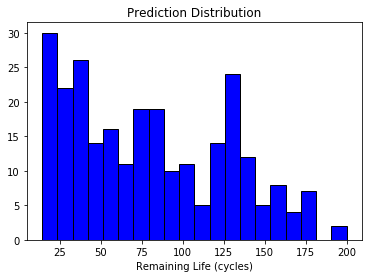

In [112]:
plt.hist(preds, bins = 20, color = 'blue', edgecolor = 'k')
plt.title('Prediction Distribution'); 
plt.xlabel('Remaining Life (cycles)');

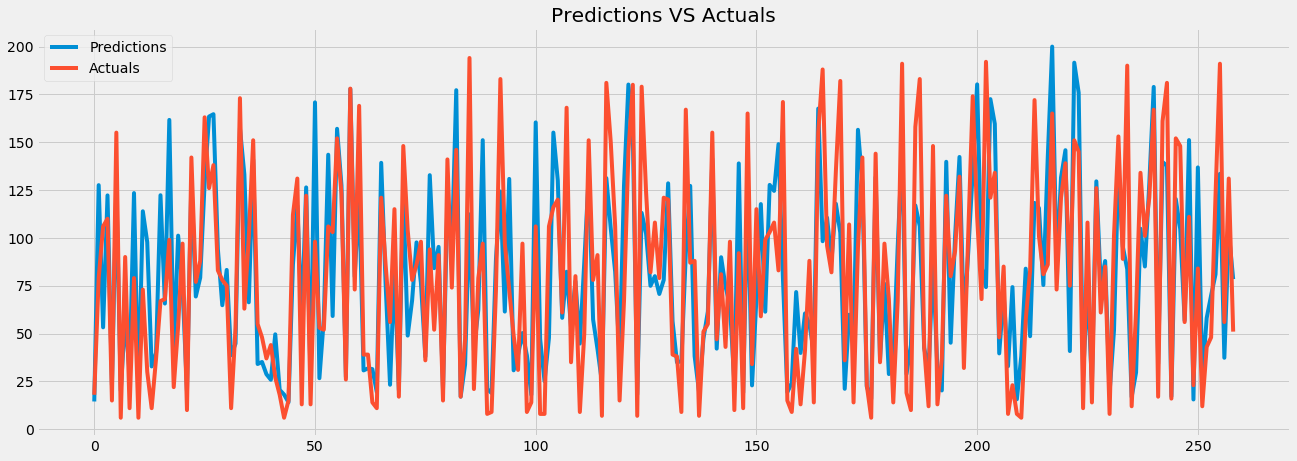

In [129]:
plt.figure(figsize=(20,7))
plt.plot(preds,label='Predictions')
plt.plot(test_labels,label='Actuals')
plt.title('Predictions VS Actuals')
plt.legend()
plt.show()

In [113]:
def plot_feature_importances(df, n = 15, color = 'blue', threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    plt.style.use('fivethirtyeight')
    # Bar plot of n most important features
    df.loc[:(n - 1), :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = color, 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)
    plt.yticks(size = 14)
    plt.xticks(size = 16)
    plt.xlabel('Normalized Importance', size = 20); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 24)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

,feature,importance,importance_normalized,cumulative_importance
0,time_in_cycles_max,0.276730,0.276730,0.276730
1,time_in_cycles_sum,0.275312,0.275312,0.552042
2,sensor_measurement_15_max,0.085976,0.085976,0.638018
3,sensor_measurement_3_max,0.055916,0.055916,0.693934
4,sensor_measurement_13_max,0.025475,0.025475,0.719409


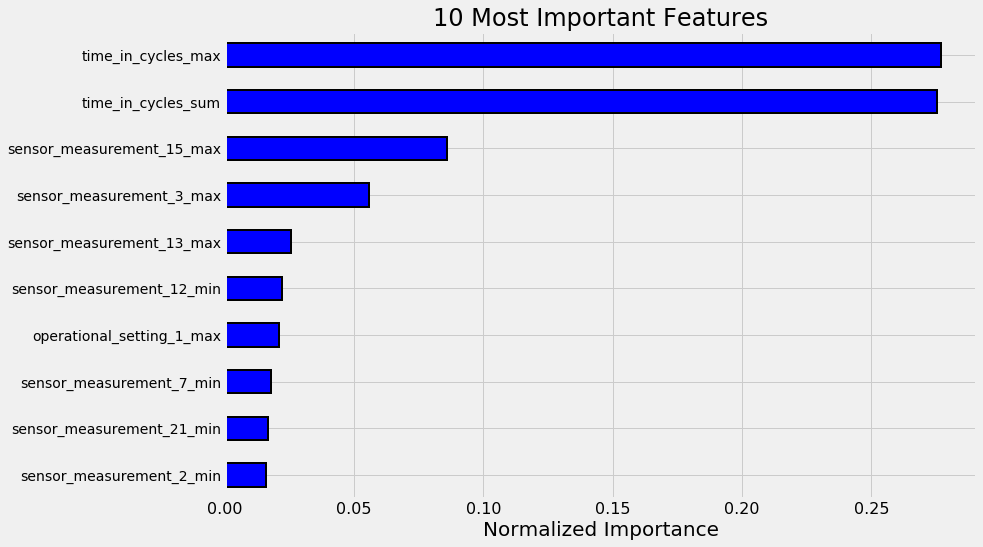

In [114]:
norm_fi = plot_feature_importances(fi, 10)
norm_fi.head()

In [130]:
from sklearn.cluster import KMeans

In [133]:
# replace nan with zeros
train_predictor1=train_predictor.fillna(0)
test_predictor1=test_predictor.fillna(0)

In [136]:
kmeans = KMeans(n_clusters = 10)
train_predictor1['cluster'] = kmeans.fit_predict(train_predictor1.drop(columns = ['engine_no', 'time_in_cycles']))
test_predictor1['cluster'] = kmeans.predict(test_predictor1.drop(columns = ['engine_no', 'time_in_cycles']))


In [137]:
train_predictor1.head()

,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26,cluster
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,2223.0,100.00,14.73,8.8071,0.0,0.0,0.0,0.0,0.0,5
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,2212.0,100.00,10.41,6.2665,0.0,0.0,0.0,0.0,0.0,1
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,1915.0,84.93,14.08,8.6723,0.0,0.0,0.0,0.0,0.0,2
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,2212.0,100.00,10.59,6.4701,0.0,0.0,0.0,0.0,0.0,1
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,1915.0,84.93,14.13,8.5286,0.0,0.0,0.0,0.0,0.0,2


In [140]:
test_predictor1.head()

,engine_no,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26,cluster
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,2319,100.00,28.42,17.1551,0.0,0.0,0.0,0.0,0.0,7
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,2324,100.00,24.29,14.8039,0.0,0.0,0.0,0.0,0.0,4
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,2223,100.00,14.98,8.9125,0.0,0.0,0.0,0.0,0.0,5
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,2212,100.00,10.35,6.4181,0.0,0.0,0.0,0.0,0.0,1
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,1915,84.93,14.31,8.5740,0.0,0.0,0.0,0.0,0.0,2


## Time Series Operations using tsfresh

- cid_ce: measures the complexity of a time series
- number_peaks: measures the number of peaks where a peak is bigger than n neighbors to the right and left
- last_location_of_maximum: locates the last occurrence of the maximum value in the time series
- skewness: the Fisher-Pearson skewness of the time series
- sample_entropy: the sample entropy of the time series

In [139]:
from tsfresh.feature_extraction.feature_calculators import (cid_ce, number_peaks, 
                                                             last_location_of_maximum, 
                                                             skewness, sample_entropy)

In [141]:
cid_ce_func = lambda x: cid_ce(x, normalize=False)
cid_ce_func.__name__ = 'cid_ce'

n_peaks = lambda x: number_peaks(x, n = 5)
n_peaks.__name__ = 'number_peaks'

# Apply the operations
train_predictor_agg = train_predictor1.drop(columns = ['time_in_cycles']).groupby('engine_no').agg(['min','max','mean','sum','std',
                                                                                                    cid_ce_func, n_peaks, 
                                                                                                    last_location_of_maximum,
                                                                                                    skewness, sample_entropy])
train_predictor_agg.head()


/anaconda3/envs/automl/lib/python3.6/site-packages/tsfresh/feature_extraction/feature_calculators.py:1514: RuntimeWarning: invalid value encountered in true_divide
  similarity_ratio = A / B
/anaconda3/envs/automl/lib/python3.6/site-packages/tsfresh/feature_extraction/feature_calculators.py:1515: RuntimeWarning: divide by zero encountered in log
  se = -1 * np.log(similarity_ratio)


operational_setting_1                                            \
                            min      max       mean        sum        std   
engine_no                                                                   
1                        0.0000  42.0077  25.414484  3024.3236  15.300117   
2                        0.0000  42.0076  23.734917  3370.3582  14.711035   
3                        0.0002  42.0073  25.365650  2029.2520  13.972098   
4                        0.0004  42.0075  23.640294  1891.2235  15.508015   
5                        0.0008  42.0071  21.721191   695.0781  14.481060   

                                                                       \
               cid_ce number_peaks last_location_of_maximum  skewness   
engine_no                                                               
1          222.130414          7.0                 0.033613 -0.452181   
2          249.163933         13.0                 0.464789 -0.256690   
3          187.684211          7.0                 0.637500 -0.234855   
4          187.265336          5.0                 0.875000 -0.201569   
5          126.381589          2.0                 0.218750 -0.074413   

                              ...       cluster                               \
          sample_entropy      ...           min max      mean  sum       std   
engine_no                     ...                                              
1               1.666739      ...             1   8  3.815126  454  2.674317   
2               1.765438      ...             0   9  4.429577  629  2.869250   
3               1.714447      ...             0   9  3.787500  303  2.791006   
4               1.716206      ...             0   9  3.850000  308  2.942917   
5               1.929910      ...             0   9  3.312500  106  2.740820   

                                                                      \
              cid_ce number_peaks last_location_of_maximum  skewness   
engine_no                                                              
1          38.223030            2                 0.949580  0.406855   
2          49.839743            5                 0.985915  0.171693   
3          34.914181            4                 0.975000  0.267571   
4          35.355339            7                 1.000000  0.300610   
5          21.189620            1                 0.750000  0.582748   

                          
          sample_entropy  
engine_no                 
1               1.666739  
2               1.850700  
3               2.131401  
4               2.163924  
5               2.063441  

[5 rows x 300 columns]

In [143]:
train_predictor_agg.shape


(260, 300)

In [144]:
train_predictor_agg.columns = pd.Index([e[0] + "_" + e[1] for e in train_predictor_agg.columns.tolist()])


In [145]:
test_predictor_agg = test_predictor1.drop(columns = ['time_in_cycles']).groupby('engine_no').agg(['min','max','mean','sum','std',
                                                                                                    cid_ce_func, n_peaks, 
                                                                                                    last_location_of_maximum,
                                                                                                    skewness, sample_entropy])
test_predictor_agg.head()


operational_setting_1                                            \
                            min      max       mean        sum        std   
engine_no                                                                   
1                        0.0002  42.0078  24.157602  6232.6614  14.625359   
2                        0.0005  42.0079  26.512127  1458.1670  15.193411   
3                        0.0001  42.0078  22.663222  3739.4316  15.144796   
4                        0.0002  42.0078  24.061074  2069.2524  14.675946   
5                        0.0000  42.0074  23.739297  3513.4160  14.189404   

                                                                       \
               cid_ce number_peaks last_location_of_maximum  skewness   
engine_no                                                               
1          335.942191         20.0                 0.352713 -0.320870   
2          153.506753          4.0                 0.018182 -0.505699   
3          278.647002         14.0                 0.406061 -0.142240   
4          219.139672          6.0                 0.453488 -0.248667   
5          243.138099         13.0                 0.493243 -0.309141   

                              ...       cluster                                \
          sample_entropy      ...           min max      mean   sum       std   
engine_no                     ...                                               
1               1.769655      ...             0   9  4.244186  1095  2.638842   
2               1.647178      ...             0   8  3.509091   193  2.707142   
3               1.786893      ...             0   8  4.387879   724  2.630932   
4               1.777363      ...             0   9  4.011628   345  2.728905   
5               1.806764      ...             0   9  4.013514   594  2.654701   

                                                                      \
              cid_ce number_peaks last_location_of_maximum  skewness   
engine_no                                                              
1          59.118525            7                 0.988372  0.201508   
2          27.477263            3                 1.000000  0.486576   
3          50.318983            4                 0.933333  0.003877   
4          37.229021            6                 1.000000  0.282670   
5          45.398238           10                 0.966216  0.288239   

                          
          sample_entropy  
engine_no                 
1               2.128938  
2               1.690042  
3               1.811917  
4               2.242846  
5               2.086638  

[5 rows x 300 columns]

In [146]:
test_predictor_agg.shape

(259, 300)

In [147]:
test_predictor_agg.columns = pd.Index([e[0] + "_" + e[1] for e in test_predictor_agg.columns.tolist()])


In [148]:
# apply feature selection on the predictors
# perform feature selection on train_predictor_agg
train_predictor_fs = feature_selection(train_predictor_agg)

# use those selected features on test_predictor_agg
test_predictor_fs = test_predictor_agg[train_predictor_fs.columns]


Original shape:  (260, 300)
0 missing columns with threshold: 90.
61 zero variance columns which have 1 unique value.
154 collinear columns removed with threshold: 0.95.
Total columns removed:  215
Shape after feature selection: (260, 85).


/anaconda3/envs/automl/lib/python3.6/site-packages/pandas/core/generic.py:8264: RuntimeWarning: invalid value encountered in absolute
  return np.abs(self)


In [153]:
# Remove the engine number since it should not be predictive
train_predictor_fs = train_predictor_fs.reset_index(drop = True)
test_predictor_fs = test_predictor_fs.reset_index(drop = True)

train_labels = train_target['target']
test_labels = test_target['target']

preds, fi = evaluate(train_predictor_fs, train_labels, test_predictor_fs, test_labels)


/anaconda3/envs/automl/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


5-fold CV MAPE: 47.70 with std: 4.22
Test MAPE: 56.58.


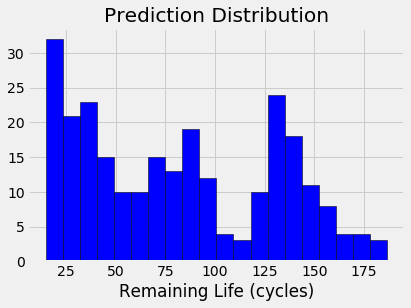

In [150]:
plt.hist(preds, bins = 20, color = 'blue', edgecolor = 'k')
plt.title('Prediction Distribution'); 
plt.xlabel('Remaining Life (cycles)');

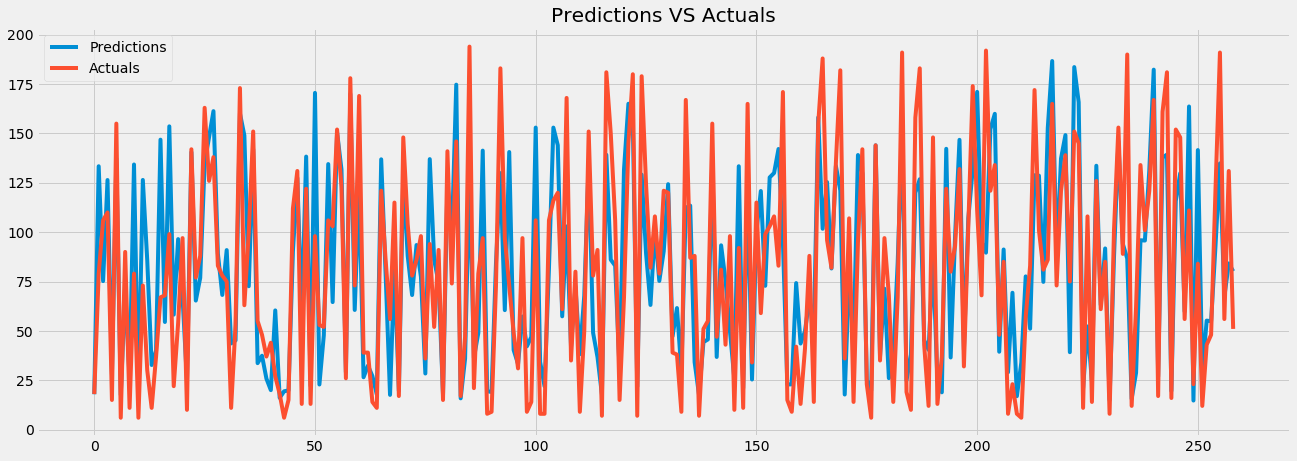

In [151]:
plt.figure(figsize=(20,7))
plt.plot(preds,label='Predictions')
plt.plot(test_labels,label='Actuals')
plt.title('Predictions VS Actuals')
plt.legend()
plt.show()

,feature,importance,importance_normalized,cumulative_importance
0,operational_setting_1_sum,0.537303,0.537303,0.537303
1,sensor_measurement_15_max,0.070380,0.070380,0.607683
2,sensor_measurement_3_max,0.054508,0.054508,0.662191
3,sensor_measurement_12_min,0.015129,0.015129,0.677320
4,operational_setting_3_cid_ce,0.014219,0.014219,0.691539


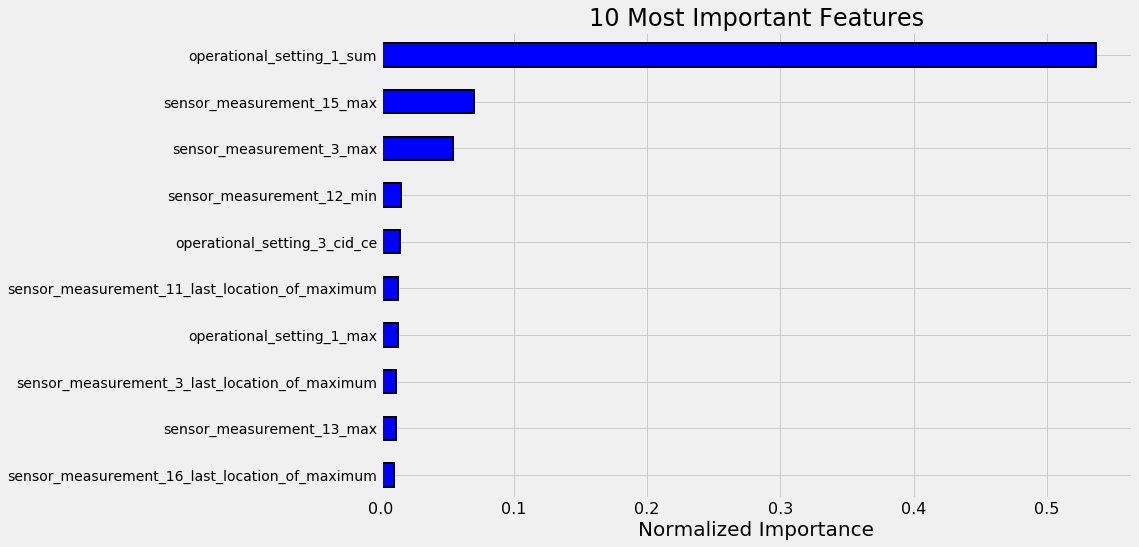

In [152]:
norm_fi = plot_feature_importances(fi, 10)
norm_fi.head()

### First try:
5-fold CV MAPE: 49.29 with std: 5.32

Test MAPE: 58.97.

### Second try:
5-fold CV MAPE: 47.70 with std: 4.22

Test MAPE: 56.58.


.

We reduced the test MAPE a little bit.

Next, we will use current predictors with optimized machine learning model.  In order to find better model, we use random search in this case.


In [155]:
from sklearn.model_selection import RandomizedSearchCV

scorer = mape_scorer

# Hyperparameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(50, 1000, num = 100)],
    'max_depth': [None] + [int(x) for x in np.linspace(4, 20)],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 0.5, 'log2', None]
}

In [156]:
# Make a model 
reg = RandomForestRegressor(n_jobs = -1, random_state = 50)

# RandomizedSearchCV object
random = RandomizedSearchCV(reg, param_grid, n_iter = 100, scoring = scorer, 
                            verbose = 1, n_jobs = -1, cv = 5, random_state = 50)

# Fit on the training data
random.fit(train_predictor_fs, train_labels)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state...


In [157]:
random.best_params_

{'n_estimators': 174,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 12}

# Predict with best model

In [158]:
best_score = -1 * random.best_score_
best_score_std = random.cv_results_['std_test_score'][np.argmax(random.cv_results_['mean_test_score'])]
best_model = random.best_estimator_


In [159]:
# Make predictions on the. test data
preds = best_model.predict(test_predictor_fs)
final_mape = mape(test_labels, preds)

print('5-fold Cross Validation MAPE: {:.2f} with std: {:.2f}'.format(best_score, best_score_std))
print('Test MAPE: {:.2f}.'.format(final_mape))


5-fold Cross Validation MAPE: 46.32 with std: 4.87
Test MAPE: 54.73.
